In [1]:
# TP3 : SIGNAL
# Rémi WEIDLE & Camille LANFREDI

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.neighbors import KernelDensity

def reference(x): #la densité de référence à estimer
        return 1/(np.sqrt(2*np.pi))*np.exp(-x**2/2)

In [2]:
#Partie 1
#Question 1
def K1(x): #noyau uniforme
    return np.where(abs(x) <= 1, 1/2, 0)
    
def K2(x): #noyau triangle
    return np.where(abs(x) <= 1, 1 - abs(x), 0)
        
def K3(x): #noyau d'Epanechnikov
    return np.where(abs(x) <= 1, (3/4)*(1-x**2), 0)
    
def K4(x): #noyau gaussien
    return (1/np.sqrt(2*np.pi))*np.exp(-x**2/2)

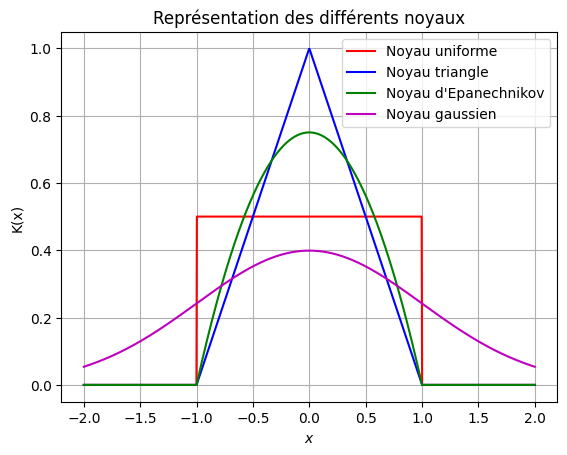

In [3]:
#Question 2
def AllplotK(pas, xmin, xmax, col1, col2, col3, col4):
    x = np.linspace(xmin, xmax, pas)
    plt.plot(x, K1(x), color=col1, label = 'Noyau uniforme')
    plt.plot(x, K2(x), color=col2, label = 'Noyau triangle')
    plt.plot(x, K3(x), color=col3, label = "Noyau d'Epanechnikov")
    plt.plot(x, K4(x), color=col4, label = 'Noyau gaussien')
    plt.title("Représentation des différents noyaux")
    plt.xlabel("$x$")
    plt.ylabel("K(x)")
    plt.legend()
    plt.grid()
    plt.show()
    return

#Test
AllplotK(1010, -2, 2, 'r', 'b', 'g', 'm')

In [4]:
#Question 3
n=100
X = np.random.normal(0, 1, n)
# Affichage de l'échantillon
# print(X)

In [5]:
# Question 4
def fchapeau(funct, h, X, x): #l'estimation de la densite f (ici la gaussienne standard, pour une fenetre h, au point x pour le noyau funct)
    s = 0
    n =  len(X)
    for i in range(n):
        s += funct((x-X[i])/h)
    return s/(n*h)

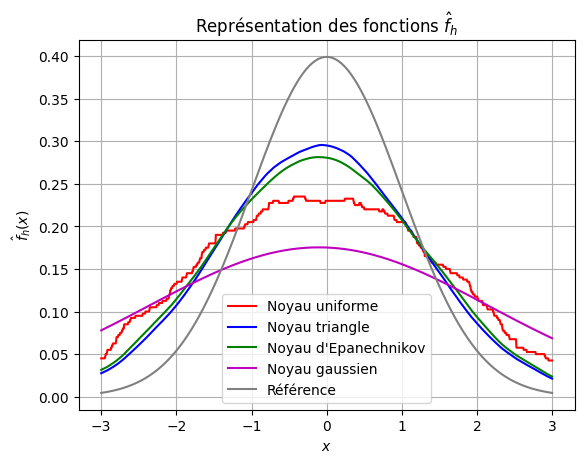

In [6]:
# Question 5
def reference(x): #fonction de reference : loi normale centrée réduite
    return norm.pdf(x, 0, 1)

def Allplotfchapeauh2(xmin, xmax, pas, col1, col2, col3, col4, colref):
    h = 2
    x = np.linspace(xmin, xmax, pas)
    plt.plot(x, fchapeau(K1, h, X, x), color=col1, label = 'Noyau uniforme')
    plt.plot(x, fchapeau(K2, h, X, x), color=col2, label = 'Noyau triangle')
    plt.plot(x, fchapeau(K3, h, X, x), color=col3, label = "Noyau d'Epanechnikov")
    plt.plot(x, fchapeau(K4, h, X, x), color=col4, label = 'Noyau gaussien')
    plt.plot(x, reference(x), color=colref, label = 'Référence')
    plt.title("Représentation des fonctions $\hat{f}_h$")
    plt.xlabel("$x$")
    plt.ylabel("$\hat{f}_h(x)$")
    plt.grid()
    plt.legend()
    plt.show()

Allplotfchapeauh2(-3, 3, 1000, 'r', 'b', 'g', 'm', 'gray')

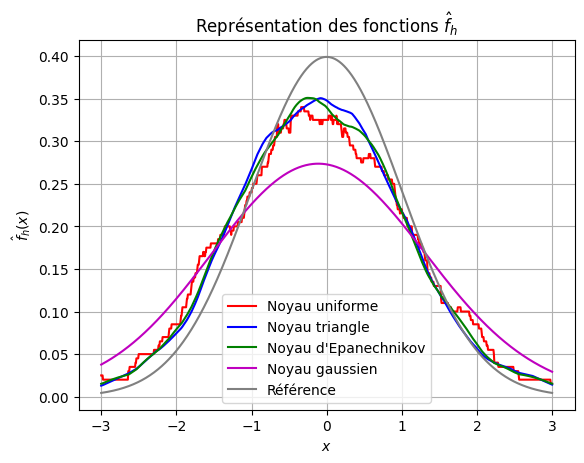

In [7]:
# Question 6
def Allplotfchapeauh1(xmin, xmax, pas, col1, col2, col3, col4, colref):
    h = 1
    x = np.linspace(xmin, xmax, pas)
    plt.plot(x, fchapeau(K1, h, X, x), color=col1, label = 'Noyau uniforme')
    plt.plot(x, fchapeau(K2, h, X, x), color=col2, label = 'Noyau triangle')
    plt.plot(x, fchapeau(K3, h, X, x), color=col3, label = "Noyau d'Epanechnikov")
    plt.plot(x, fchapeau(K4, h, X, x), color=col4, label = 'Noyau gaussien')
    plt.plot(x, reference(x), color=colref, label = 'Référence')
    plt.title("Représentation des fonctions $\hat{f}_h$")
    plt.xlabel("$x$")
    plt.ylabel("$\hat{f}_h(x)$")
    plt.grid()
    plt.legend()
    plt.show()

Allplotfchapeauh1(-3, 3, 1000, 'r', 'b', 'g', 'm', 'gray')

On constate que l'estimation diffère davantage lorsque l'on fait varier la fenêtre $h$.

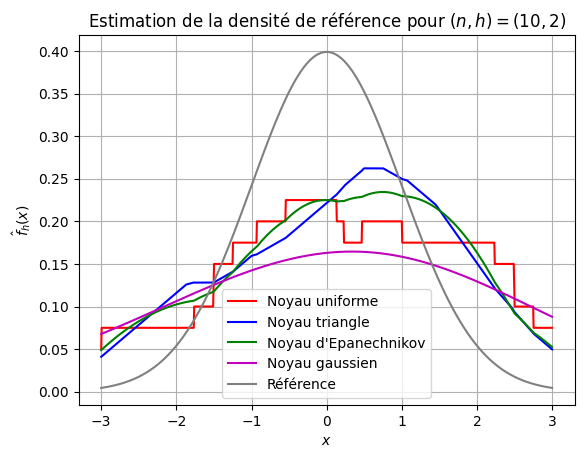

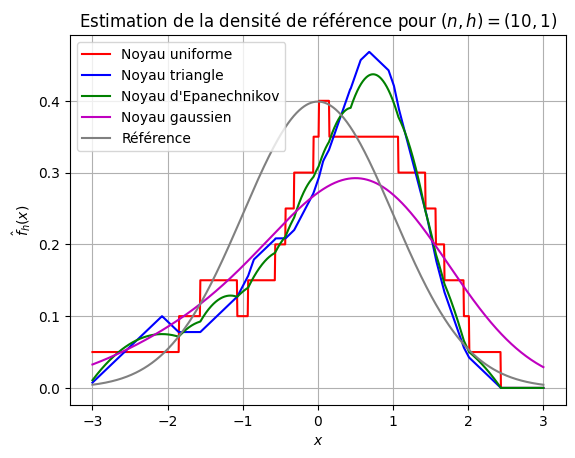

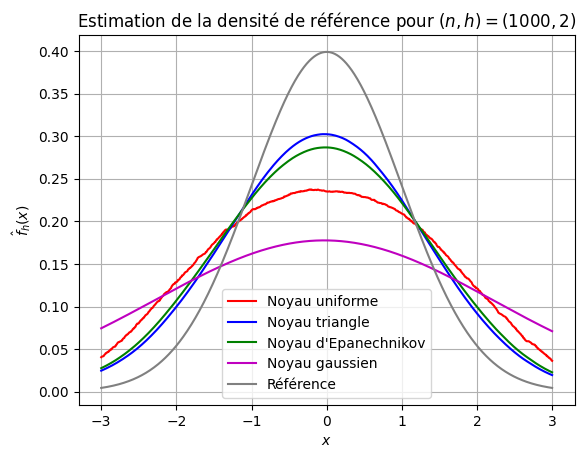

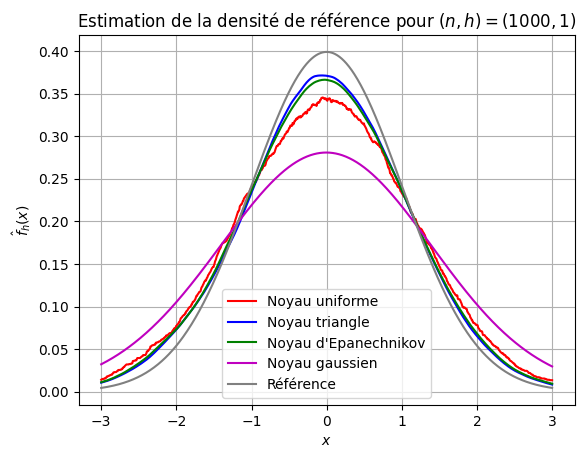

In [9]:
# Question 7
def Allplotfchapeau(xmin, xmax, pas, col1, col2, col3, col4, colref, n, h): #On ajoute les valeurs de n et h aux paramètres de la fonction
    X = np.random.normal(0, 1, n) #On définit notre réalisation
    x = np.linspace(xmin, xmax, pas)
    #Calcul des estimations de densité de référence
    plt.plot(x, fchapeau(K1, h, X, x), color=col1, label = 'Noyau uniforme')
    plt.plot(x, fchapeau(K2, h, X, x), color=col2, label = 'Noyau triangle')
    plt.plot(x, fchapeau(K3, h, X, x), color=col3, label = "Noyau d'Epanechnikov")
    plt.plot(x, fchapeau(K4, h, X, x), color=col4, label = 'Noyau gaussien')
    plt.plot(x, reference(x), color=colref, label = 'Référence')
    plt.title("Estimation de la densité de référence pour $(n,h)=({},{})$".format(n,h))
    plt.xlabel("$x$")
    plt.ylabel("$\hat{f}_h(x)$")
    plt.grid()
    plt.legend()
    plt.show()

Allplotfchapeau(-3, 3, 1000, 'r', 'b', 'g', 'm', 'gray', 10, 2)
Allplotfchapeau(-3, 3, 1000, 'r', 'b', 'g', 'm', 'gray', 10, 1)
Allplotfchapeau(-3, 3, 1000, 'r', 'b', 'g', 'm', 'gray', 1000, 2)
Allplotfchapeau(-3, 3, 1000, 'r', 'b', 'g', 'm', 'gray', 1000, 1)

L'allure des distributions est mieux représentée lorsque nous avons un grand nombre de points N grand. De plus, l'estimation s'approche davantage de la référence pour quand h augmente.

In [10]:
#Question 8
def SCE(funct, h, f):
    s = 0
    for i in range(501):
        ti = -5 + i*(10/500)
        s += (fchapeau(funct, h, X, ti) - f(ti))**2
    return s

Définir une fonction **lemeilleurh** qui prend une fonction (le noyau en question) et une autre fonction f (la référence) en paramètre et retourne l’index divisé par $100$ du minimum de la liste ${SCE(\frac{k}{100})}_{1≤k≤200}$. Pour chaque noyau, la meilleure fenêtre pour l’etimation de la fonction de
référence est donnée par cette fonction.


In [11]:
#Question 9
def lemeilleurh(funct, f):
    min = SCE(funct, 1/100, f)
    for k in range(2,201):
         val = SCE(funct, k/100, f)
         if min >= val:
              min = val
              h = k
    return h/100    

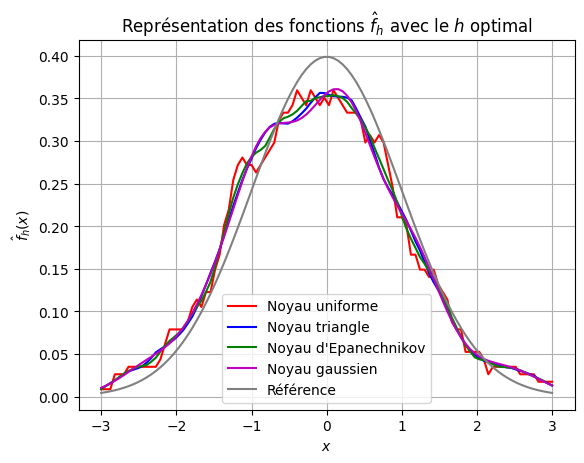

In [12]:
#Question 10
def Allplotfchapeauhoptimal(xmin, xmax, pas, col1, col2, col3, col4, colref):
    hu = lemeilleurh(K1, reference) #fenetre uniforme optimale
    ht = lemeilleurh(K2, reference) #fenetre triangle optimale
    he = lemeilleurh(K3, reference) #fenetre d'Epanechnikov optimale
    hg = lemeilleurh(K4, reference) #fenetre gaussienne optimale
    x = np.linspace(xmin, xmax, pas)
    plt.plot(x, fchapeau(K1, hu, X, x), color=col1, label = 'Noyau uniforme')
    plt.plot(x, fchapeau(K2, ht, X, x), color=col2, label = 'Noyau triangle')
    plt.plot(x, fchapeau(K3, he, X, x), color=col3, label = "Noyau d'Epanechnikov")
    plt.plot(x, fchapeau(K4, hg, X, x), color=col4, label = 'Noyau gaussien')
    plt.plot(x, reference(x), color=colref, label = 'Référence')
    plt.title("Représentation des fonctions $\hat{f}_h$ avec le $h$ optimal")
    plt.xlabel("$x$")
    plt.ylabel("$\hat{f}_h(x)$")
    plt.grid()
    plt.legend()
    plt.show()


Allplotfchapeauhoptimal(-3, 3, 100, 'r', 'b', 'g', 'm', 'gray')

Nous constatons que l'estimation diffère davantage lorsque l'on fait varier la fenêtre $h$.

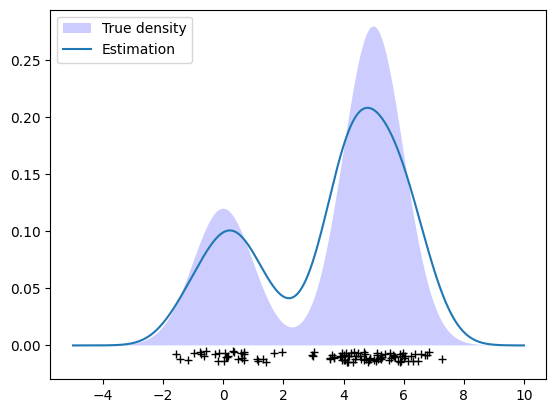

In [24]:
# PARTIE 2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.neighbors import KernelDensity

def estimationdensite(N, h, mu1, sigma1, mu2, sigma2):
    X = np.concatenate((np.random.normal(mu1, sigma1, int(0.3 * N)),
                        np.random.normal(mu2, sigma2, int(0.7 * N))))[:, np.newaxis]

    X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]

    true_density = (0.3 * norm(mu1, sigma1).pdf(X_plot[:, 0]) + 0.7 * norm(mu2, sigma2).pdf(X_plot[:, 0]))

    kde = KernelDensity(kernel='gaussian', bandwidth=h).fit(X)

    density = np.exp(kde.score_samples(X_plot))

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.fill(X_plot[:, 0], true_density, fc='b', alpha=0.2, label='True density')
    ax.plot(X_plot[:, 0], density, '-', label="Estimation")
    ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')
    ax.legend(loc='upper left')
    plt.show()

# Question 1
estimationdensite(100, 0.75, 0, 1, 5, 1)

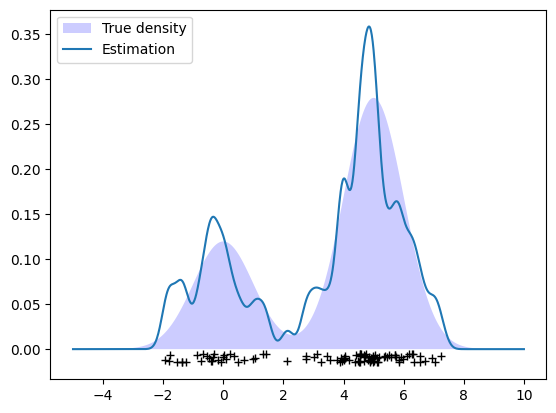

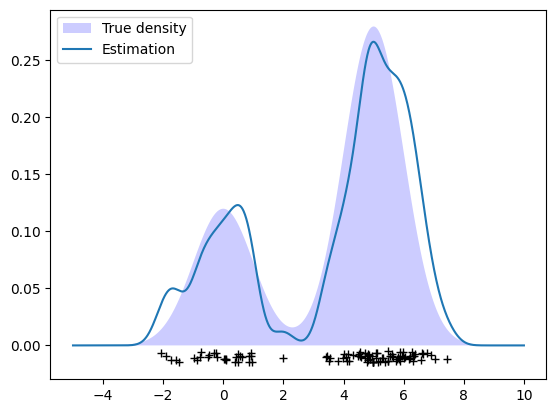

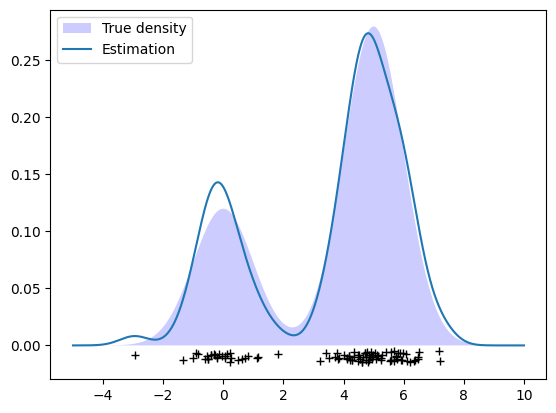

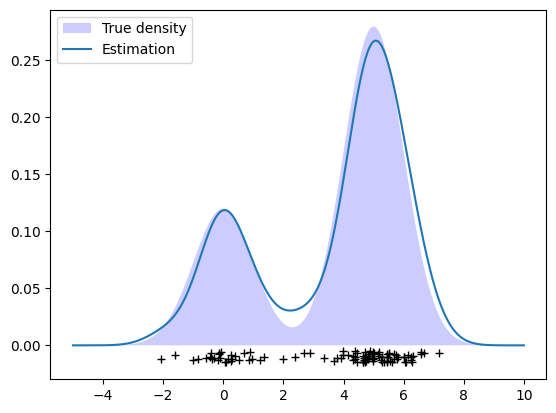

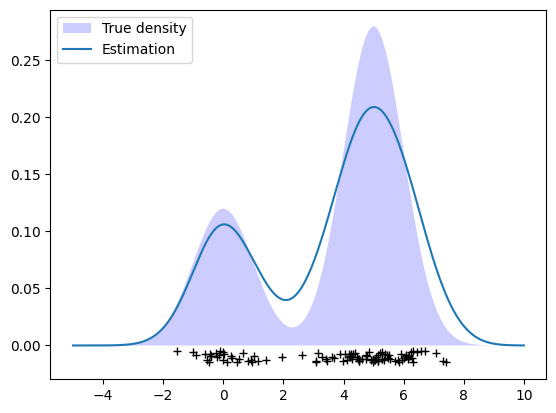

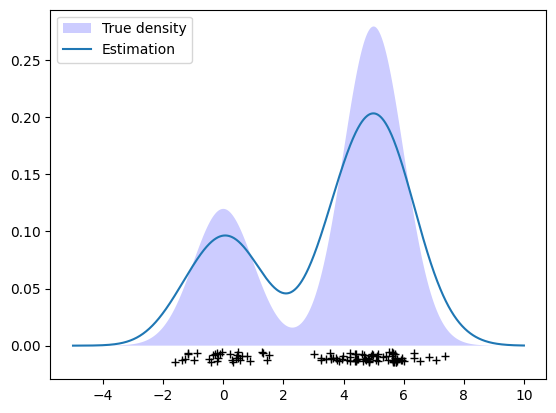

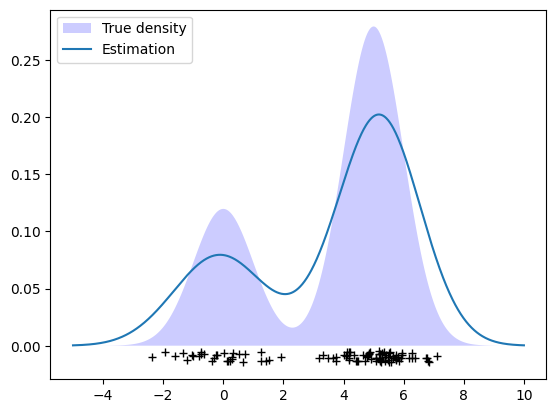

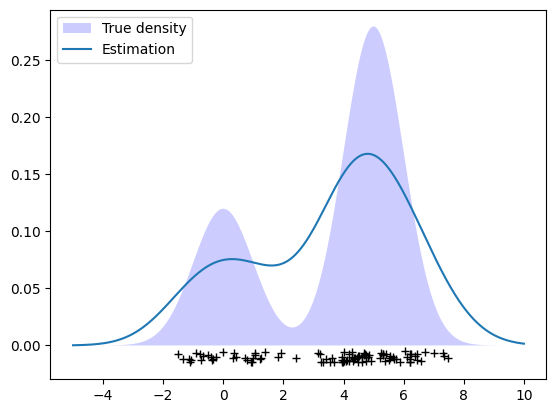

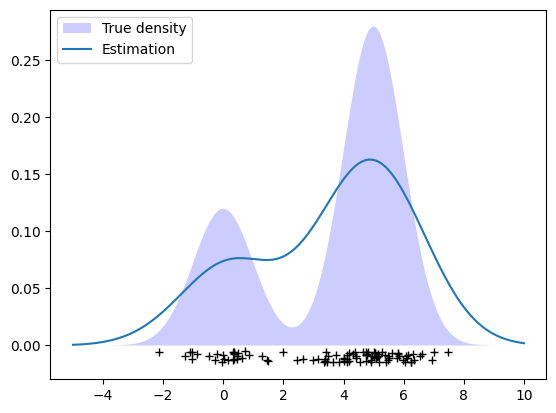

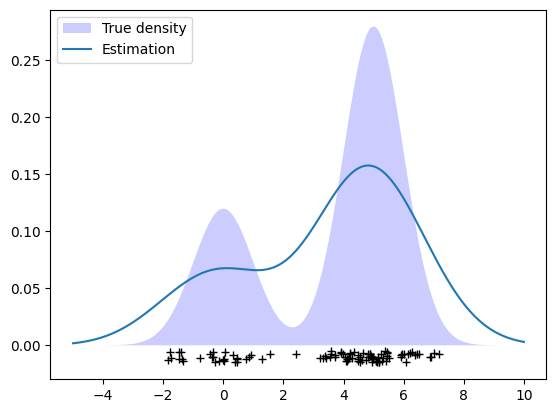

In [25]:
# Question 2
for h in np.linspace(0.2, 1.5, 10):
    estimationdensite(100, h, 0, 1, 5, 1)

In [ ]:
On constate que lorsque le fenêtrage est relativement faible ou trop élevé, l'estimation s'éloigne de la densité réelle. Il faut donc trouver le juste milieu.

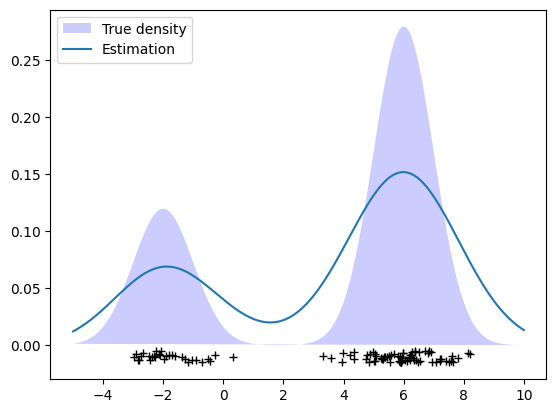

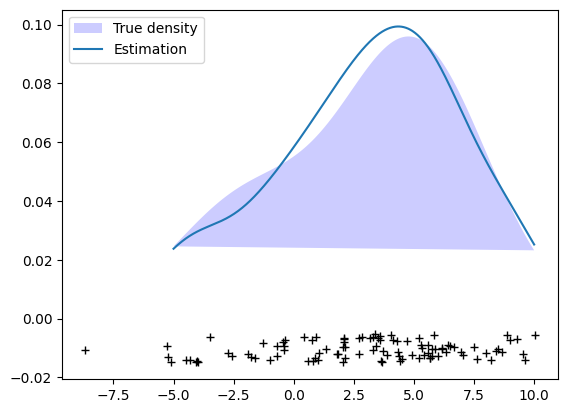

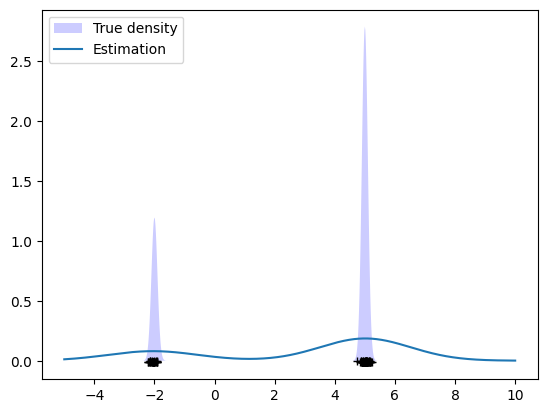

In [26]:
# Question 3
estimationdensite(100, 1.5, -2, 1, 6, 1) #variation de la moyenne
estimationdensite(100, 1.5, -2, 3, 5, 3) #augmentation de l'écart-type
estimationdensite(100, 1.5, -2, 0.1, 5, 0.1) #diminution de l'écart-type

In [ ]:
Quand la moyenne varie, nous observons une translation de la distribution. Lorsque la valeur de sigma augmente, 
 la largeur de la cloche augmente, et le pic s'affine lorsque l'écart-type diminue.

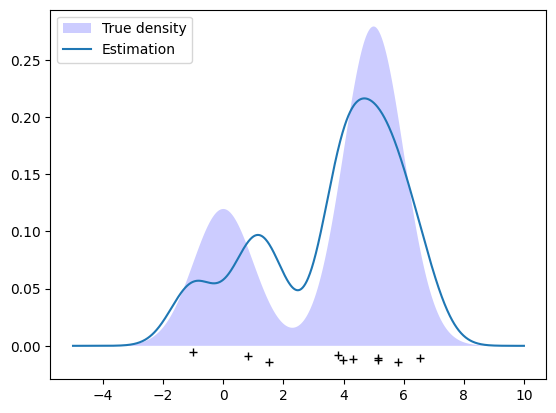

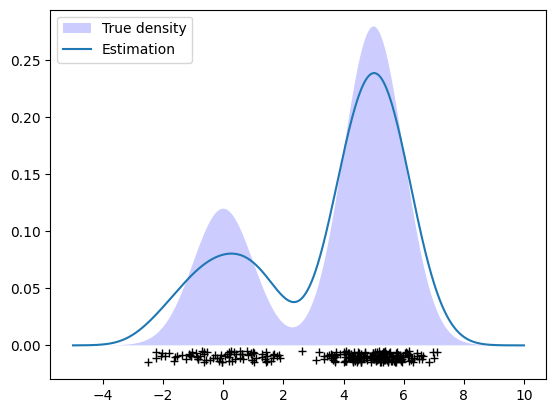

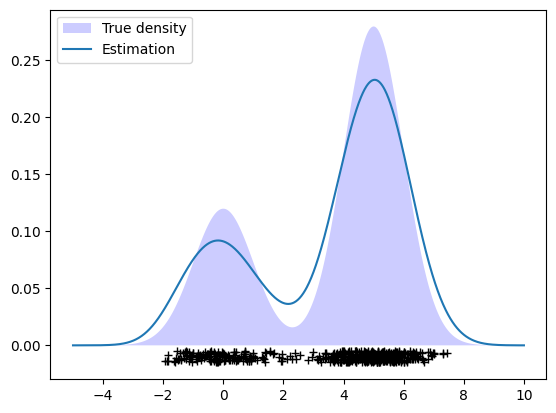

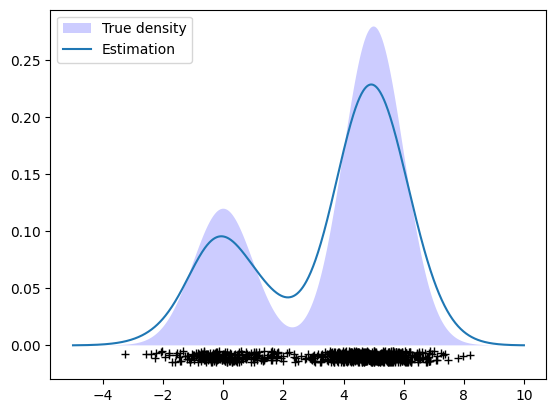

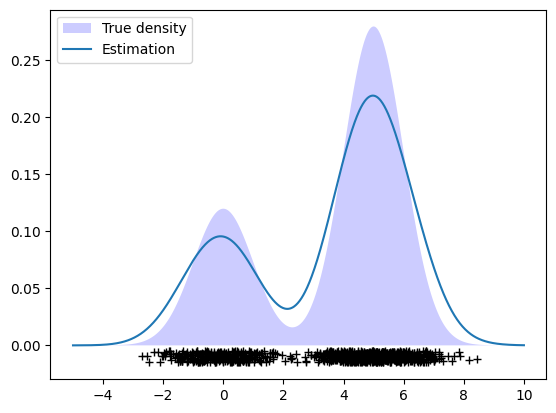

In [27]:
#Question 4
listN = np.linspace(10, 1000, 5)

for N in listN:
    estimationdensite(N, 0.75, 0, 1, 5, 1)

In [ ]:

Lorsque N augmente, la population augmente et l'estimation tend davantage vers la référence.

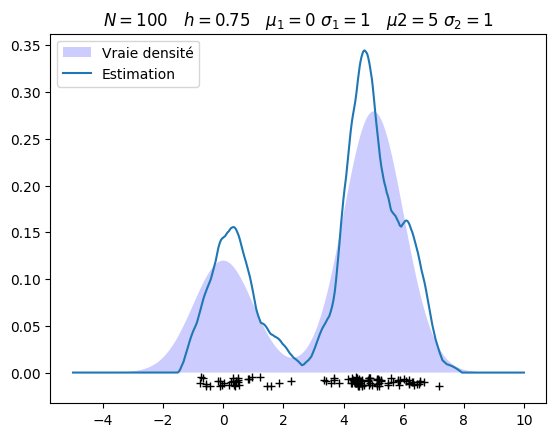

In [28]:
# Question 5
def estimationdensite2(N,h,mu1,sigma1,mu2,sigma2):
        # générer l'échantillon à partir de deux lois normales
        X = np.concatenate((np.random.normal(mu1, sigma1, int(0.3 * N)),
                            np.random.normal(mu2, sigma2, int(0.7 * N))))[:, np.newaxis]

        # préparer les points où on calculera la densité
        X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]

        # préparation de l'affichage de la vraie densité, qui est celle à partir
        #  de laquelle les données ont été générées (voir plus haut)
        # la pondération des lois dans la somme est la pondération des lois
        #  dans l'échantillon généré (voir plus haut)
        true_density = (0.3 * norm(mu1,sigma1).pdf(X_plot[:,0]) + 0.7 * norm(mu2,sigma2).pdf(X_plot[:,0]))

        # estimation de densité par noyaux d'epanechnikov
        kde = KernelDensity(kernel='epanechnikov', bandwidth=h).fit(X)   


        # calcul de la densité pour les données de X_plot
        density = np.exp(kde.score_samples(X_plot))

        # affichage : vraie densité et estimation
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.fill(X_plot[:,0], true_density, fc='b', alpha=0.2, label='Vraie densité')
        ax.plot(X_plot[:,0], density, '-', label="Estimation")
        ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')
        plt.title("$N = {}$   $h = {}$   $\mu_1 = {}$ $\sigma_1 = {}$   $\mu2 = {}$ $\sigma_2 = {}$".format(N, h, mu1, sigma1, mu2, sigma2))
        ax.legend(loc='upper left')
        plt.show()    
estimationdensite2(100, 0.75, 0, 1, 5, 1)